In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Monthly,salary,age,python_yn,R_yn,spark,aws,excel
0,Data Engineer,₹59K - ₹64K,About phData\n\nWe build next-generation strat...,2.9,phData\n2.9,Bengaluru,"Minneapolis, MN",51 to 200 employees,2014,Company - Private,...,Unknown / Non-Applicable,-1,0,59.0,6,1,0,1,1,1
1,Data Scientist,"₹2,353K - ₹2,511K","Position: Data Scientist\n\nLocation: Pune, In...",3.9,NICE Actimize\n3.9,Pune,"Hoboken, NJ",501 to 1000 employees,1999,Subsidiary or Business Segment,...,Unknown / Non-Applicable,"SAS, Feedzai",0,2353.0,21,1,0,0,0,1
2,Data Scientist,"₹1,471,718","Date: Jul 9, 2020\n\nAs the tech firm that cre...",3.9,Ericsson-Worldwide\n3.9,Noida,"Stockholm, Sweden",10000+ employees,1876,Company - Public,...,₹500+ billion (INR),"Huawei Technologies, IBM, Cisco Systems",0,1471718.0,144,1,0,0,0,1
3,Data Scientist,"₹1,532,392","At Amazon, we strive to be most customer-centr...",4.3,Amazon\n4.3,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,...,₹500+ billion (INR),"Google, Microsoft, Walmart",0,1532392.0,26,1,0,1,1,1
4,Data Scientist,"₹1,206,892",Introduction\n• The role will involve running ...,3.9,IBM\n3.9,Gurgaon,"Armonk, NY",10000+ employees,1911,Company - Public,...,₹500+ billion (INR),"Amazon, Accenture, Microsoft",0,1206892.0,109,1,0,0,0,0


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
df.job_simp.value_counts()

data scientist    85
analyst            3
na                 2
data engineer      1
mle                1
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)

In [7]:
df.seniority.value_counts()

na        89
senior     3
Name: seniority, dtype: int64

In [8]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     3541
1     2970
2     3856
3     4616
4     3937
      ... 
87    3717
88    2818
89    1285
90    1577
91    3575
Name: desc_len, Length: 92, dtype: int64

In [9]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0     0
1     2
2     3
3     3
4     3
     ..
87    3
88    3
89    3
90    0
91    0
Name: num_comp, Length: 92, dtype: int64

In [10]:
df['Competitors']

0                                                    -1
1                                          SAS, Feedzai
2               Huawei Technologies, IBM, Cisco Systems
3                            Google, Microsoft, Walmart
4                          Amazon, Accenture, Microsoft
                            ...                        
87                       Capgemini, Accenture, Deloitte
88                            GlowRoad, Shop101, Wooplr
89    Mindtree, Happiest Minds Technologies, Altran ...
90                                                   -1
91                                                   -1
Name: Competitors, Length: 92, dtype: object

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Engineer,₹59K - ₹64K,About phData\n\nWe build next-generation strat...,2.9,phData\n2.9,Bengaluru,"Minneapolis, MN",51 to 200 employees,2014,Company - Private,...,6,1,0,1,1,1,data engineer,na,3541,0
1,Data Scientist,"₹2,353K - ₹2,511K","Position: Data Scientist\n\nLocation: Pune, In...",3.9,NICE Actimize\n3.9,Pune,"Hoboken, NJ",501 to 1000 employees,1999,Subsidiary or Business Segment,...,21,1,0,0,0,1,data scientist,na,2970,2
2,Data Scientist,"₹1,471,718","Date: Jul 9, 2020\n\nAs the tech firm that cre...",3.9,Ericsson-Worldwide\n3.9,Noida,"Stockholm, Sweden",10000+ employees,1876,Company - Public,...,144,1,0,0,0,1,data scientist,na,3856,3
3,Data Scientist,"₹1,532,392","At Amazon, we strive to be most customer-centr...",4.3,Amazon\n4.3,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,...,26,1,0,1,1,1,data scientist,na,4616,3
4,Data Scientist,"₹1,206,892",Introduction\n• The role will involve running ...,3.9,IBM\n3.9,Gurgaon,"Armonk, NY",10000+ employees,1911,Company - Public,...,109,1,0,0,0,0,data scientist,na,3937,3


In [12]:
# monthly to annualy
df['salary'] = df.apply(lambda x: x.salary*12 if x.Monthly == 1 else x.salary,axis=1)

In [13]:
df[df['Monthly'] == 1][['Monthly','salary']]

,Monthly,salary
9,1,299940.0
64,1,333972.0
88,1,486972.0


In [14]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Monthly', 'salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [15]:
df['Company Name'] = df.apply(lambda x: x.replace('\n',''))
df['Company Name']

0      Data Engineer
1     Data Scientist
2     Data Scientist
3     Data Scientist
4     Data Scientist
           ...      
87    Data Scientist
88    Data Scientist
89    Data Scientist
90    Data Scientist
91    Data Scientist
Name: Company Name, Length: 92, dtype: object

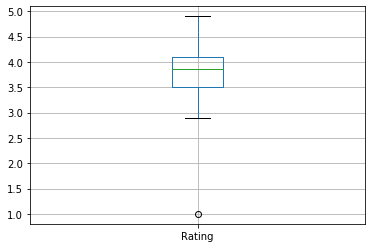

In [16]:
df.boxplot(column = 'Rating')

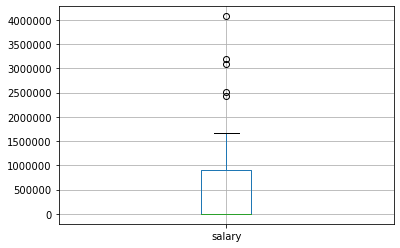

In [17]:
df.boxplot(column = ['salary'])

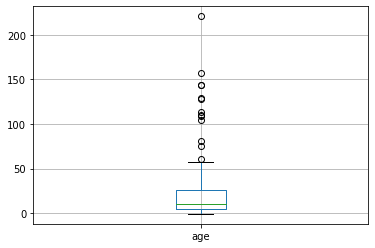

In [18]:
df.boxplot(column = 'age')

In [19]:
df[['age','salary','Rating','desc_len']].corr()

,age,salary,Rating,desc_len
age,1.000000,0.106247,-0.001612,0.448363
salary,0.106247,1.000000,-0.088095,0.095909
Rating,-0.001612,-0.088095,1.000000,0.033566
desc_len,0.448363,0.095909,0.033566,1.000000


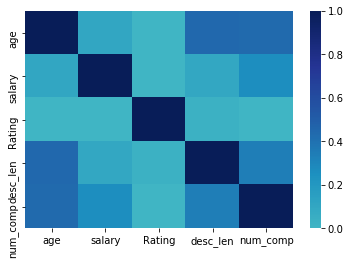

In [20]:
sns.heatmap(df[['age','salary','Rating','desc_len','num_comp']].corr(), vmin=0, vmax=1,center=0,cmap="YlGnBu")

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Monthly', 'salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [22]:
df_cat =df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority']]
df_cat

,Location,Headquarters,Size,Type of ownership,Industry,Sector,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,Bengaluru,"Minneapolis, MN",51 to 200 employees,Company - Private,IT Services,Information Technology,1,0,1,1,1,data engineer,na
1,Pune,"Hoboken, NJ",501 to 1000 employees,Subsidiary or Business Segment,Computer Hardware & Software,Information Technology,1,0,0,0,1,data scientist,na
2,Noida,"Stockholm, Sweden",10000+ employees,Company - Public,Telecommunications Services,Telecommunications,1,0,0,0,1,data scientist,na
3,Hyderabad,"Seattle, WA",10000+ employees,Company - Public,Internet,Information Technology,1,0,1,1,1,data scientist,na
4,Gurgaon,"Armonk, NY",10000+ employees,Company - Public,IT Services,Information Technology,1,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Bengaluru,"Tokyo, Japan",10000+ employees,Company - Public,IT Services,Information Technology,1,0,1,1,1,data scientist,na
88,Bengaluru,"Bengaluru, India",501 to 1000 employees,Company - Private,"Department, Clothing, & Shoe Shops",Retail,1,0,1,0,0,data scientist,na
89,Bengaluru,"Bengaluru, India",1001 to 5000 employees,Company - Private,IT Services,Information Technology,1,0,0,0,0,data scientist,na
90,Bengaluru,"Menlo Park, CA",1 to 50 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,1,0,0,0,1,data scientist,na


[Text(0, 0, 'Bengaluru'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Gurgaon'),
 Text(0, 0, 'Noida'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Indore'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Kozhikode'),
 Text(0, 0, 'Andheri'),
 Text(0, 0, 'Vikhroli')]

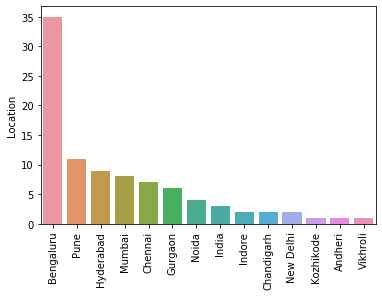

In [23]:
cat_nm = df_cat['Location'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
    

[Text(0, 0, 'Bengaluru, India'),
 Text(0, 0, 'Mumbai, India'),
 Text(0, 0, 'Pune, India'),
 Text(0, 0, 'San Jose, CA'),
 Text(0, 0, 'Noida, India'),
 Text(0, 0, 'Boston, MA'),
 Text(0, 0, 'Seattle, WA'),
 Text(0, 0, 'Stockholm, Sweden'),
 Text(0, 0, 'London, United Kingdom'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Hyderabad, India'),
 Text(0, 0, 'Chandigarh, India'),
 Text(0, 0, 'Dallas, TX'),
 Text(0, 0, 'New Delhi, India'),
 Text(0, 0, 'Mountain View, CA'),
 Text(0, 0, 'Zurich, Switzerland'),
 Text(0, 0, 'Palo Alto, CA'),
 Text(0, 0, 'Overland Park, KS'),
 Text(0, 0, 'Saint Louis, MO'),
 Text(0, 0, 'Hoofddorp, Netherlands'),
 Text(0, 0, 'Chakan, India'),
 Text(0, 0, 'Hanover, MD'),
 Text(0, 0, 'Monument, CO'),
 Text(0, 0, 'Walnut, CA'),
 Text(0, 0, 'San Diego, CA'),
 Text(0, 0, 'Espoo, Finland'),
 Text(0, 0, 'Menlo Park, CA'),
 Text(0, 0, 'Minneapolis, MN'),
 Text(0, 0, 'Buffalo Grove, IL'),
 Text(0, 0, 'San Francisco, CA'),
 Text(0, 0, 'Tokyo, Japan'),
 Text(0, 0, 'Zug, Switzerla

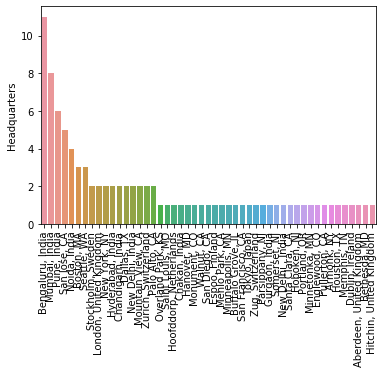

In [24]:
cat_nm = df_cat['Headquarters'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '10000+ employees'),
 Text(0, 0, '1 to 50 employees'),
 Text(0, 0, '201 to 500 employees'),
 Text(0, 0, '51 to 200 employees'),
 Text(0, 0, '1001 to 5000 employees'),
 Text(0, 0, '501 to 1000 employees'),
 Text(0, 0, '5001 to 10000 employees'),
 Text(0, 0, 'Unknown')]

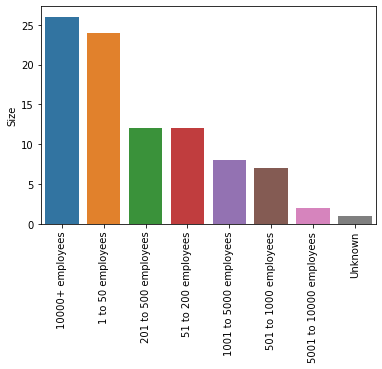

In [25]:
cat_nm = df_cat['Size'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '0'), Text(0, 0, '1')]

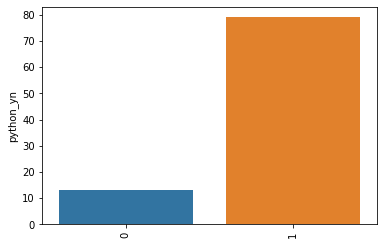

In [26]:
cat_nm = df_cat['python_yn'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '0')]

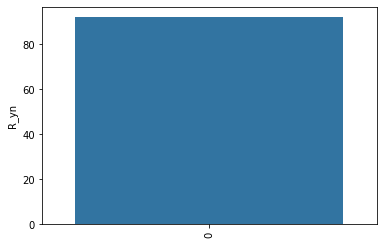

In [27]:
cat_nm = df_cat['R_yn'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '0'), Text(0, 0, '1')]

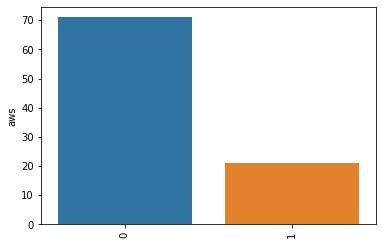

In [28]:
cat_nm = df_cat['aws'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '0'), Text(0, 0, '1')]

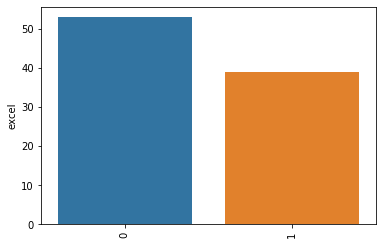

In [29]:
cat_nm = df_cat['excel'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'data scientist'),
 Text(0, 0, 'analyst'),
 Text(0, 0, 'na'),
 Text(0, 0, 'data engineer'),
 Text(0, 0, 'mle')]

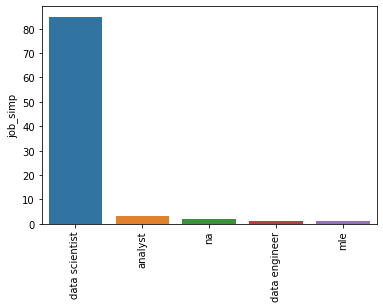

In [30]:
cat_nm = df_cat['job_simp'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'na'), Text(0, 0, 'senior')]

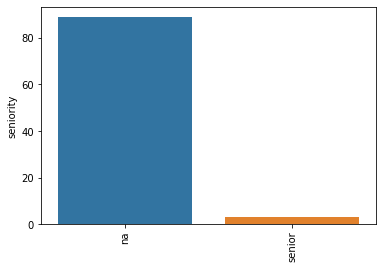

In [31]:
cat_nm = df_cat['seniority'].value_counts()
chart = sns.barplot(x=cat_nm.index,y=cat_nm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [32]:
pd.pivot_table(df,index=['job_simp','seniority'],values='salary')

salary
job_simp       seniority              
analyst        na         6.290000e+02
data engineer  na         5.900000e+01
data scientist na         4.922526e+05
               senior     1.506264e+06
mle            na         2.090000e+02
na             na         6.190255e+05

In [33]:
pd.pivot_table(df,index=['Location','job_simp'],values='salary').sort_values('salary',ascending=False)

salary
Location   job_simp                    
New Delhi  data scientist  1.595640e+06
Noida      data scientist  9.790285e+05
Vikhroli   data scientist  7.757110e+05
Bengaluru  data scientist  7.097082e+05
           na              6.914710e+05
Gurgaon    data scientist  6.719202e+05
Mumbai     na              5.465800e+05
Hyderabad  data scientist  4.750889e+05
Pune       data scientist  4.234859e+05
Mumbai     data scientist  2.808700e+05
Chennai    data scientist  1.173557e+05
Hyderabad  analyst         1.083000e+03
India      data scientist  5.863333e+02
Bengaluru  analyst         4.020000e+02
Kozhikode  data scientist  2.860000e+02
Mumbai     mle             2.090000e+02
Bengaluru  data engineer   5.900000e+01
Chandigarh data scientist  3.150000e+01
Andheri    data scientist  1.900000e+01
Indore     data scientist  1.750000e+01

In [35]:
pd.pivot_table(df,index=['Location','job_simp'],values='salary',aggfunc='count').sort_values('Location',ascending=False)

salary
Location   job_simp              
Vikhroli   data scientist       1
Pune       data scientist      11
Noida      data scientist       4
New Delhi  data scientist       2
Mumbai     na                   1
           mle                  1
           data scientist       6
Kozhikode  data scientist       1
Indore     data scientist       2
India      data scientist       3
Hyderabad  data scientist       8
           analyst              1
Gurgaon    data scientist       6
Chennai    data scientist       7
Chandigarh data scientist       2
Bengaluru  analyst              2
           na                   1
           data scientist      31
           data engineer        1
Andheri    data scientist       1

In [38]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','salary']]

In [47]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='salary').sort_values('salary',ascending=False))

Rating
              salary
Rating              
3.3     2.681370e+06
3.0     1.260954e+06
4.3     1.240282e+06
4.1     8.558828e+05
3.4     6.200467e+05
3.1     5.136877e+05
4.0     4.982410e+05
3.8     4.759882e+05
3.6     4.167486e+05
4.5     4.062410e+05
3.2     4.050185e+05
3.9     3.962605e+05
3.5     3.525656e+05
2.9     3.342163e+05
3.7     2.160193e+05
4.2     6.736500e+04
4.6     3.980000e+02
1.0     3.510000e+02
4.8     3.150000e+01
4.9     3.000000e+01
4.7     1.500000e+01
Industry
                                               salary
Industry                                             
TV Broadcasting & Cable Networks         3.084051e+06
Insurance Agencies & Brokerages          2.425730e+06
Telecommunications Manufacturing         1.668996e+06
Healthcare Services & Hospitals          1.095602e+06
Consulting                               1.071610e+06
Cable, Internet & Telephone Providers    1.034642e+06
Lending                                  8.123230e+05
Internet       

ValueError: Grouper for 'salary' not 1-dimensional

In [48]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
Unknown / Non-Applicable,6.0,36.0
₹1 to ₹5 billion (INR),NaN,9.0
₹10 to ₹50 billion (INR),1.0,3.0
₹10 to ₹50 million (INR),NaN,4.0
₹100 to ₹500 billion (INR),NaN,6.0
₹100 to ₹500 million (INR),NaN,3.0
₹50 to ₹100 billion (INR),NaN,1.0
₹50 to ₹100 million (INR),NaN,1.0
₹500 million to ₹1 billion (INR),1.0,2.0


In [49]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'aws', values = 'salary', aggfunc = 'count')

aws,0,1
Revenue,,
Unknown / Non-Applicable,33.0,9.0
₹1 to ₹5 billion (INR),8.0,1.0
₹10 to ₹50 billion (INR),4.0,NaN
₹10 to ₹50 million (INR),4.0,NaN
₹100 to ₹500 billion (INR),1.0,5.0
₹100 to ₹500 million (INR),3.0,NaN
₹50 to ₹100 billion (INR),1.0,NaN
₹50 to ₹100 million (INR),1.0,NaN
₹500 million to ₹1 billion (INR),2.0,1.0


In [51]:
!pip install wordcloud

Using legacy setup.py install for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\dell\appdata\local\programs\python\python37-32\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-4qdwbuem\\wordcloud\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-4qdwbuem\\wordcloud\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Dell\AppData\Local\Temp\pip-record-v169f0wg\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\dell\appdata\local\programs\python\python37-32\Include\wordcloud'
         cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-4qdwbuem\wordcloud\
    Complete output (20 lines):
    running install
    running build
    running build_py
    creating build
    creating build\lib.win32-3.7
    c

In [52]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [53]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Engineer,₹59K - ₹64K,About phData\n\nWe build next-generation strat...,2.9,Data Engineer,Bengaluru,"Minneapolis, MN",51 to 200 employees,2014,Company - Private,...,6,1,0,1,1,1,data engineer,na,3541,0
1,Data Scientist,"₹2,353K - ₹2,511K","Position: Data Scientist\n\nLocation: Pune, In...",3.9,Data Scientist,Pune,"Hoboken, NJ",501 to 1000 employees,1999,Subsidiary or Business Segment,...,21,1,0,0,0,1,data scientist,na,2970,2
2,Data Scientist,"₹1,471,718","Date: Jul 9, 2020\n\nAs the tech firm that cre...",3.9,Data Scientist,Noida,"Stockholm, Sweden",10000+ employees,1876,Company - Public,...,144,1,0,0,0,1,data scientist,na,3856,3
3,Data Scientist,"₹1,532,392","At Amazon, we strive to be most customer-centr...",4.3,Data Scientist,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,...,26,1,0,1,1,1,data scientist,na,4616,3
4,Data Scientist,"₹1,206,892",Introduction\n• The role will involve running ...,3.9,Data Scientist,Gurgaon,"Armonk, NY",10000+ employees,1911,Company - Public,...,109,1,0,0,0,0,data scientist,na,3937,3


In [55]:
df.to_csv('eda_data.csv',index=0)